This notebook is about community comparison. Based on private vehicle traffic accidents and public transit accidents, we generated a choropleth map. We choose two community, downtown LA and Pacific palisades. Downtown LA represented high accident rate community, Pacific palisades represented low high accident rate community.

## Import Data

In [39]:
# importing python libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
# read and add shapefile to notebook
df = pd.read_csv('Data/R13559086_SL140.csv')

In [3]:
# convert FIPS, STATE, and COUNTY to string
df = pd.read_csv(
    'Data/R13559086_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [4]:
# check data 
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017,Low-Income,Middle-Income,High-Income
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,4.77,14.25,6.58,11.73,9.28,7.93,11.41,528,723,300
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,2.24,15.04,12.51,7.38,13.09,14.75,20.68,198,695,490
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,6.00,15.49,12.75,3.19,8.08,9.64,10.45,464,614,271
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,10.18,6.67,10.53,9.83,4.56,7.79,3.58,667,595,162
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,2.48,2.48,11.53,2.80,14.76,3.77,5.60,525,316,87


In [5]:
# confirm the columns have correct data type
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 81 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_US             0 non-null      float64
 6   Geo_REGION         0 non-null      float64
 7   Geo_DIVISION       0 non-null      float64
 8   Geo_STATE          2498 non-null   object 
 9   Geo_COUNTY         2498 non-null   object 
 10  Geo_COUSUB         0 non-null      float64
 11  Geo_PLACE          0 non-null      float64
 12  Geo_TRACT          2498 non-null   int64  
 13  Geo_BLKGRP         0 non-null      float64
 14  Geo_CONCIT         0 non-null      float64
 15  Geo_AIANHH         0 non-null      float64
 16  Geo_AIANHHFP       0 non

In [6]:
# check which columns are null columns
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [7]:
# delete null columns
df = df.dropna(axis=1,how="all")

In [8]:
# check data information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2498 non-null   object 
 1   Geo_QName          2498 non-null   object 
 2   Geo_STUSAB         2498 non-null   object 
 3   Geo_SUMLEV         2498 non-null   int64  
 4   Geo_GEOCOMP        2498 non-null   int64  
 5   Geo_STATE          2498 non-null   object 
 6   Geo_COUNTY         2498 non-null   object 
 7   Geo_TRACT          2498 non-null   int64  
 8   Geo_NAME           2498 non-null   object 
 9   SE_A14001_001      2498 non-null   int64  
 10  SE_A14001_002      2498 non-null   int64  
 11  SE_A14001_003      2498 non-null   int64  
 12  SE_A14001_004      2498 non-null   int64  
 13  SE_A14001_005      2498 non-null   int64  
 14  SE_A14001_006      2498 non-null   int64  
 15  SE_A14001_007      2498 non-null   int64  
 16  SE_A14001_008      2498 

In [9]:
# display and check the fisrt 5 row
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_NAME,SE_A14001_001,...,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017,Low-Income,Middle-Income,High-Income
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,06,037,101110,Census Tract 1011.10,1551,...,4.77,14.25,6.58,11.73,9.28,7.93,11.41,528,723,300
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,06,037,101122,Census Tract 1011.22,1383,...,2.24,15.04,12.51,7.38,13.09,14.75,20.68,198,695,490
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,06,037,101220,Census Tract 1012.20,1349,...,6.00,15.49,12.75,3.19,8.08,9.64,10.45,464,614,271
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,06,037,101221,Census Tract 1012.21,1424,...,10.18,6.67,10.53,9.83,4.56,7.79,3.58,667,595,162
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,06,037,101222,Census Tract 1012.22,928,...,2.48,2.48,11.53,2.80,14.76,3.77,5.60,525,316,87


In [10]:
# define the columns that I want to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_001',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017',
                   'Low-Income',
                   'Middle-Income',
                   'High-Income']

In [11]:
# save these columns
df2 = df[columns_to_keep]

In [12]:
# return list of columns
columns = list(df2) 
columns

['Geo_FIPS',
 'SE_A14001_001',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017',
 'Low-Income',
 'Middle-Income',
 'High-Income']

In [13]:
# rename these columns associate with household income
df2.columns = ['FIPS',
'Total_Household',
'Less than $10,000',
'$10,000 to $14,999',
'$15,000 to $19,999',
'$20,000 to $24,999',
'$25,000 to $29,999',
'$30,000 to $34,999',
'$35,000 to $39,999',
'$40,000 to $44,999',
'$45,000 to $49,999',
'$50,000 to $59,999',
'$60,000 to $74,999',
'$75,000 to $99,999',
'$100,000 to $124,999',
'$125,000 to $149,999',
'$150,000 to $199,999',
'$200,000 or More',
'Low-Income',
'Middle-Income',
'High-Income']

In [14]:
# display five random samples to confirm the columns rename successfully
df2.sample(5)

,FIPS,Total_Household,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999",...,"$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Low-Income,Middle-Income,High-Income
272,06037131100,1083,18,45,0,44,0,10,0,35,...,66,117,136,225,102,122,147,168,646,269
164,06037120108,1424,185,42,86,94,76,95,58,28,...,114,102,136,163,25,170,45,669,540,215
1980,06037572301,938,39,0,7,54,73,50,36,19,...,73,85,112,71,66,125,79,327,407,204
917,06037262301,828,30,5,28,5,0,0,6,14,...,9,21,35,68,5,88,510,92,138,598
779,06037227020,766,0,0,36,24,46,70,29,61,...,35,139,71,65,95,34,21,306,405,55


In [15]:
# read in a geojson file 
tracts=gpd.read_file('Data/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<Axes: >

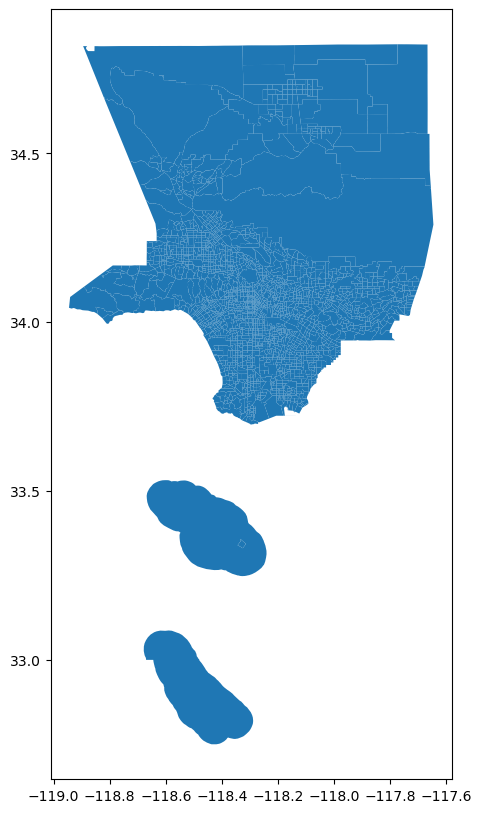

In [16]:
# plot it
tracts.plot(figsize=(12,10))

In [17]:
# info about this dataset
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [18]:
# only keep FIPS and geometry
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [19]:
# create a FIPS column
tracts['FIPS'] ='06' + '037' + tracts['CT20']

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [20]:
# check it
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [21]:
# create a new dataframe based on the join
tracts['FIPS'] = tracts['FIPS'].astype(int)
df2['FIPS'] = df2['FIPS'].astype(int)

# Merge the DataFrames
tracts_income = tracts.merge(df2, on='FIPS')

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_105/2312057885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FIPS'] = df2['FIPS'].astype(int)


In [22]:
# check it
tracts_income.head()

,CT20,geometry,FIPS,Total_Household,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999",...,"$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Low-Income,Middle-Income,High-Income
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",6037101110,1551,67,96,33,72,11,78,...,74,221,102,182,144,123,177,528,723,300
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",6037101122,1383,84,0,7,44,20,29,...,31,208,173,102,181,204,286,198,695,490
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",6037101220,1349,85,61,9,91,24,24,...,81,209,172,43,109,130,141,464,614,271
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",6037101221,1424,84,90,59,136,26,107,...,145,95,150,140,65,111,51,667,595,162
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",6037101222,928,68,182,60,29,33,55,...,23,23,107,26,137,35,52,525,316,87


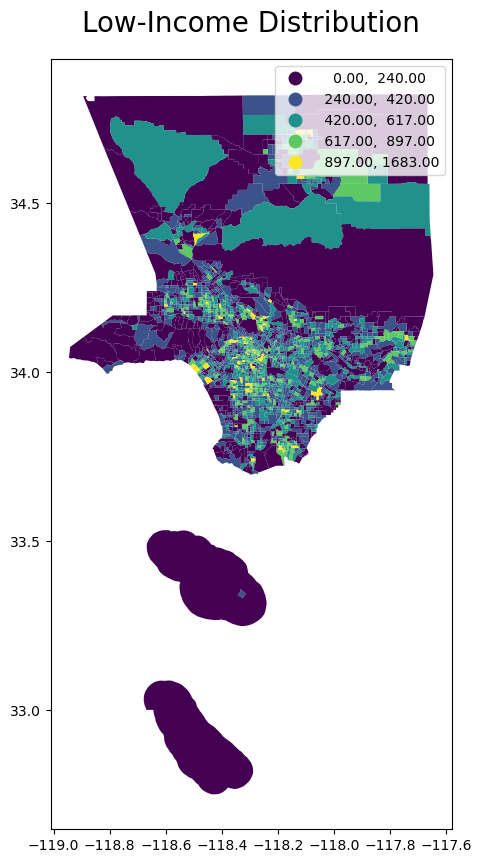

In [41]:
# create choropleth maps in geopandas
fig, ax = plt.subplots(1, figsize=(12, 10))
tracts_income.plot(ax=ax,
                   column='Low-Income',
                   legend=True,
                   scheme='NaturalBreaks')

ax.set_title('Low-Income Distribution', fontdict={'fontsize': 20}, pad=20)

plt.savefig('Low-Income Distribution3')
plt.show()

Low-income households are mostly distributed in the bottom central area.

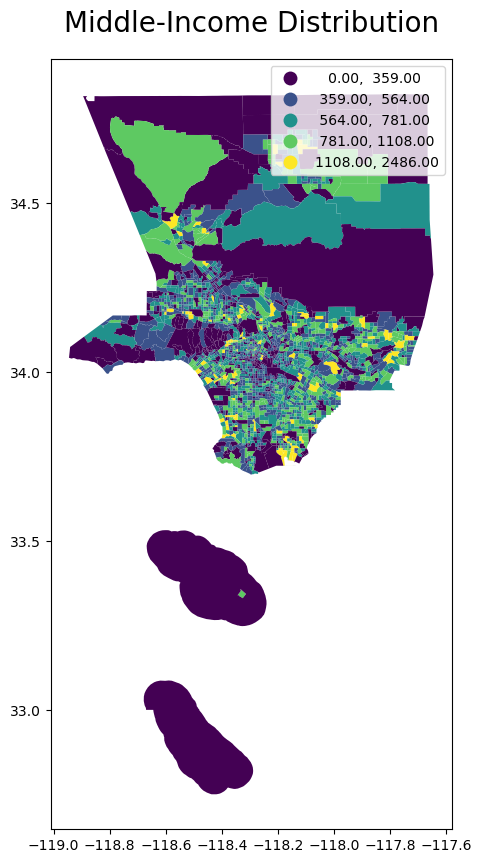

In [42]:
# create choropleth maps in geopandas
fig, ax = plt.subplots(1, figsize=(12, 10))
tracts_income.plot(ax=ax,
                   column='Middle-Income',
                   legend=True,
                   scheme='NaturalBreaks')

ax.set_title('Middle-Income Distribution', fontdict={'fontsize': 20}, pad=20)

plt.savefig('Middle-Income Distribution3')
plt.show()

Middle-income households are mostly distributed in the bottom right.

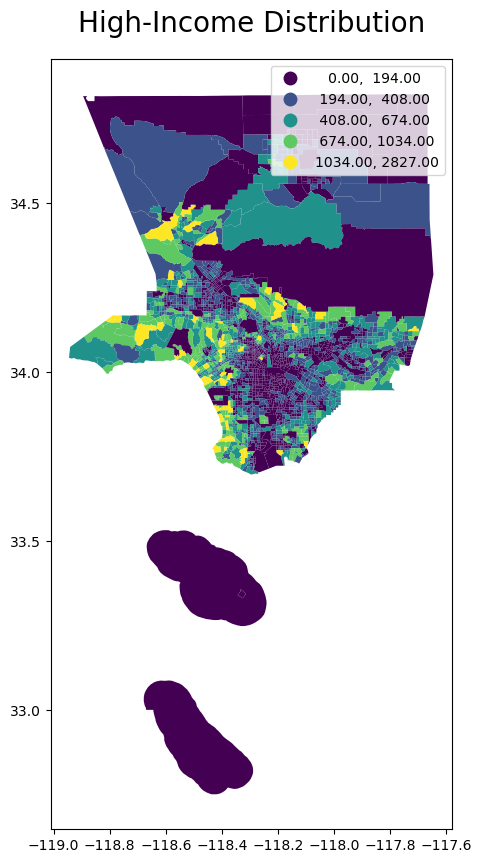

In [43]:
# create choropleth maps in geopandas
fig, ax = plt.subplots(1, figsize=(12, 10))
tracts_income.plot(ax=ax,
                   column='High-Income',
                   legend=True,
                   scheme='NaturalBreaks')

ax.set_title('High-Income Distribution', fontdict={'fontsize': 20}, pad=20)

plt.savefig('High-Income Distribution3')
plt.show()

High-income households are mostly distributed in the bottom left.

Based on observing the maps, we initially concluded that the low-income distribution choropleth map is more consistent with the traffic accidents distribution pattern, both of them are concentrated in the central area of Los Angeles. In order to determine the relationship between household income and traffic safety, we still need further analysis through community comparison.

## PACIFIC PALISADES Community Plot

In [90]:
# show rows that Latitude is not empty
tracts_income[tracts_income['FIPS'].isin([6037262501, 6037262601, 6037262604, 6037262704, 6037262706, 6037262802])]

,CT20,geometry,FIPS,Total_Household,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999",...,"$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Low-Income,Middle-Income,High-Income
921,262501,"POLYGON ((-118.52146 34.05646, -118.52220 34.0...",6037262501,1328,56,7,0,11,7,36,...,33,24,75,41,64,103,786,202,237,889
922,262601,"POLYGON ((-118.56623 34.08226, -118.56736 34.0...",6037262601,1238,35,0,0,38,0,0,...,23,28,63,20,97,134,783,90,231,917
923,262604,"POLYGON ((-118.55171 34.06502, -118.55186 34.0...",6037262604,2177,182,61,16,38,0,0,...,58,85,105,165,195,36,1191,342,608,1227
924,262704,"POLYGON ((-118.52945 34.04889, -118.52943 34.0...",6037262704,1532,69,0,9,76,8,49,...,80,65,73,125,109,213,616,251,452,829
925,262706,"POLYGON ((-118.51788 34.03004, -118.51794 34.0...",6037262706,1266,16,23,20,0,0,31,...,36,100,89,128,59,128,595,131,412,723
926,262802,"POLYGON ((-118.49261 34.05321, -118.49253 34.0...",6037262802,1441,99,16,20,69,0,63,...,53,44,120,88,100,182,575,279,405,757


In [91]:
# trimming the dataset
data_trimmed = tracts_income[tracts_income['FIPS'].isin([6037262501, 6037262601, 6037262604, 6037262704, 6037262706, 6037262802])]
data_trimmed

,CT20,geometry,FIPS,Total_Household,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999",...,"$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Low-Income,Middle-Income,High-Income
921,262501,"POLYGON ((-118.52146 34.05646, -118.52220 34.0...",6037262501,1328,56,7,0,11,7,36,...,33,24,75,41,64,103,786,202,237,889
922,262601,"POLYGON ((-118.56623 34.08226, -118.56736 34.0...",6037262601,1238,35,0,0,38,0,0,...,23,28,63,20,97,134,783,90,231,917
923,262604,"POLYGON ((-118.55171 34.06502, -118.55186 34.0...",6037262604,2177,182,61,16,38,0,0,...,58,85,105,165,195,36,1191,342,608,1227
924,262704,"POLYGON ((-118.52945 34.04889, -118.52943 34.0...",6037262704,1532,69,0,9,76,8,49,...,80,65,73,125,109,213,616,251,452,829
925,262706,"POLYGON ((-118.51788 34.03004, -118.51794 34.0...",6037262706,1266,16,23,20,0,0,31,...,36,100,89,128,59,128,595,131,412,723
926,262802,"POLYGON ((-118.49261 34.05321, -118.49253 34.0...",6037262802,1441,99,16,20,69,0,63,...,53,44,120,88,100,182,575,279,405,757


In [92]:
# define variable
df_sorted = data_trimmed.sort_values(by='Low-Income',ascending = False)

In [93]:
# display data 
df_sorted[['FIPS','Low-Income']]

,FIPS,Low-Income
923,6037262604,342
926,6037262802,279
924,6037262704,251
921,6037262501,202
925,6037262706,131
922,6037262601,90


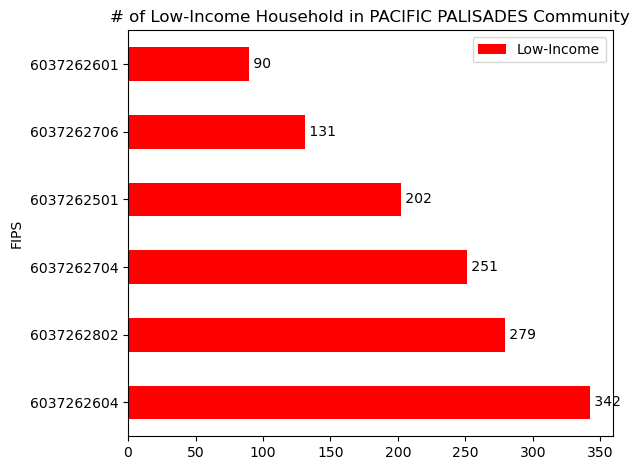

In [100]:
# make the figure looks better

ax = df_sorted.plot.barh(x='FIPS',
                            y='Low-Income', 
                            title='# of Low-Income Household in PACIFIC PALISADES Community',
                            color='red')

# add number for each column
# define numbers
numbers = [342, 279, 251, 202, 131, 90]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.tight_layout()
plt.savefig('Number of Low-Income Household in PACIFIC PALISADES Community')
plt.show()

In Pacific Palisades community, census tract 6037262604 has the most low-income households, with 342. Census tract 6037262601 has the fewest low-income households, with 90. The average number of low-income household in Pacific Palisades community is 216. 

In [103]:
# define variable
df_sorted = data_trimmed.sort_values(by='Middle-Income',ascending = False)
# display data 
df_sorted[['FIPS','Middle-Income']]

,FIPS,Middle-Income
923,6037262604,608
924,6037262704,452
925,6037262706,412
926,6037262802,405
921,6037262501,237
922,6037262601,231


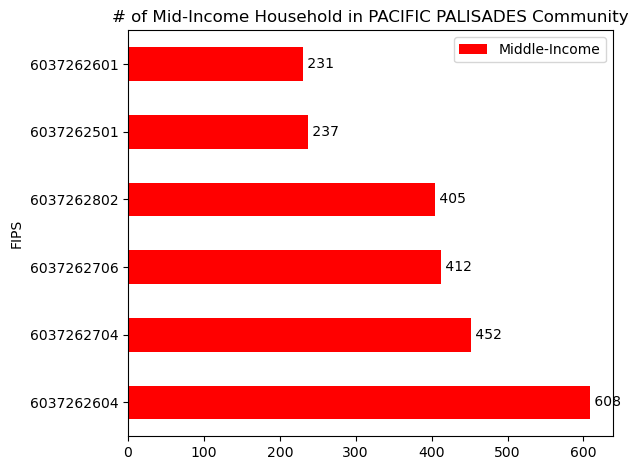

In [104]:
# make the figure looks better
ax = df_sorted.plot.barh(x='FIPS',
                            y='Middle-Income', 
                            title='# of Mid-Income Household in PACIFIC PALISADES Community',
                            color='red')

# add number for each column
# define numbers
numbers = [608, 452, 412, 405, 237, 231]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.tight_layout()
plt.savefig('Number of Middle-Income Household in PACIFIC PALISADES Community')
plt.show()

In Pacific Palisades community, census tract 6037262604 has the most middle-income households, with 608. Census tract 6037262601 has the fewest middle-income households, with 231. The average number of middle-income household in Pacific Palisades community is 391. 

In [105]:
# define variable
df_sorted = data_trimmed.sort_values(by='High-Income',ascending = False)
# display data 
df_sorted[['FIPS','High-Income']]

,FIPS,High-Income
923,6037262604,1227
922,6037262601,917
921,6037262501,889
924,6037262704,829
926,6037262802,757
925,6037262706,723


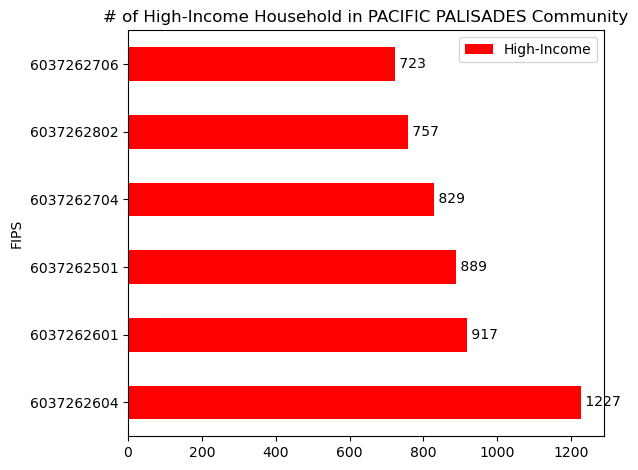

In [106]:
# make the figure looks better
ax = df_sorted.plot.barh(x='FIPS',
                            y='High-Income', 
                            title='# of High-Income Household in PACIFIC PALISADES Community',
                            color='red')

# add number for each column
# define numbers
numbers = [1227, 917, 889, 829, 757, 723]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.tight_layout()
plt.savefig('Number of High-Income Household in PACIFIC PALISADES Community')
plt.show()

In Pacific Palisades community, census tract 6037262604 has the most high-income households, with 1227. Census tract 6037262706 has the fewest high-income households, with 723. The average number of high-income household in Pacific Palisades community is 890. Every census tract in Pacific Palisades has certain high-income households.

## DOWNTOWN LA Community Plot

In [107]:
# show rows that Latitude is not empty
tracts_income[tracts_income['FIPS'].isin([6037206051, 6037206052, 6037206201, 6037206202, 6037206301, 6037206302, 6037206303, 6037207303, 6037207304, 6037207305, 6037207306, 6037207307, 6037207308, 6037207501, 6037207502, 6037207711, 6037207712, 6037207901, 6037207902, 6037224010, 6037224020, 6037226001, 6037226002, 6037207400])]

,CT20,geometry,FIPS,Total_Household,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999",...,"$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Low-Income,Middle-Income,High-Income
582,206051,"POLYGON ((-118.23121 34.04152, -118.23137 34.0...",6037206051,882,18,0,34,9,32,40,...,0,69,214,23,30,197,216,133,336,413
583,206052,"POLYGON ((-118.23632 34.05368, -118.23654 34.0...",6037206052,1790,102,95,52,54,23,68,...,121,82,157,121,206,212,384,507,687,596
586,206201,"POLYGON ((-118.24345 34.04496, -118.24301 34.0...",6037206201,1189,140,108,52,54,74,25,...,63,17,81,54,50,222,76,626,265,298
587,206202,"POLYGON ((-118.23806 34.04439, -118.23807 34.0...",6037206202,1222,148,346,69,65,108,48,...,23,19,33,111,12,88,98,838,198,186
588,206301,"POLYGON ((-118.24704 34.04167, -118.24656 34.0...",6037206301,1142,287,438,213,125,15,0,...,0,0,0,20,8,0,0,1114,28,0
589,206302,"POLYGON ((-118.24550 34.04193, -118.24525 34.0...",6037206302,651,336,130,32,16,32,0,...,0,0,18,0,0,0,0,633,18,0
590,206303,"POLYGON ((-118.24049 34.04210, -118.24123 34.0...",6037206303,558,254,108,73,14,21,0,...,88,0,0,0,0,0,0,470,88,0
594,207303,"POLYGON ((-118.25301 34.04147, -118.25232 34.0...",6037207303,1832,282,232,110,162,104,75,...,83,163,208,0,34,66,229,1049,488,295
595,207304,"POLYGON ((-118.25202 34.04483, -118.25176 34.0...",6037207304,1614,550,485,43,59,0,0,...,0,84,123,71,61,81,57,1137,339,138
596,207305,"POLYGON ((-118.24831 34.04882, -118.24696 34.0...",6037207305,634,39,20,0,18,51,17,...,77,87,12,10,30,69,149,200,216,218


In [108]:
# trimming the dataset
data_trimmed = tracts_income[tracts_income['FIPS'].isin([6037206051, 6037206052, 6037206201, 6037206202, 6037206301, 6037206302, 6037206303, 6037207303, 6037207304, 6037207305, 6037207306, 6037207307, 6037207308, 6037207501, 6037207502, 6037207711, 6037207712, 6037207901, 6037207902, 6037224010, 6037224020, 6037226001, 6037226002, 6037207400])]
data_trimmed

,CT20,geometry,FIPS,Total_Household,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999",...,"$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or More",Low-Income,Middle-Income,High-Income
582,206051,"POLYGON ((-118.23121 34.04152, -118.23137 34.0...",6037206051,882,18,0,34,9,32,40,...,0,69,214,23,30,197,216,133,336,413
583,206052,"POLYGON ((-118.23632 34.05368, -118.23654 34.0...",6037206052,1790,102,95,52,54,23,68,...,121,82,157,121,206,212,384,507,687,596
586,206201,"POLYGON ((-118.24345 34.04496, -118.24301 34.0...",6037206201,1189,140,108,52,54,74,25,...,63,17,81,54,50,222,76,626,265,298
587,206202,"POLYGON ((-118.23806 34.04439, -118.23807 34.0...",6037206202,1222,148,346,69,65,108,48,...,23,19,33,111,12,88,98,838,198,186
588,206301,"POLYGON ((-118.24704 34.04167, -118.24656 34.0...",6037206301,1142,287,438,213,125,15,0,...,0,0,0,20,8,0,0,1114,28,0
589,206302,"POLYGON ((-118.24550 34.04193, -118.24525 34.0...",6037206302,651,336,130,32,16,32,0,...,0,0,18,0,0,0,0,633,18,0
590,206303,"POLYGON ((-118.24049 34.04210, -118.24123 34.0...",6037206303,558,254,108,73,14,21,0,...,88,0,0,0,0,0,0,470,88,0
594,207303,"POLYGON ((-118.25301 34.04147, -118.25232 34.0...",6037207303,1832,282,232,110,162,104,75,...,83,163,208,0,34,66,229,1049,488,295
595,207304,"POLYGON ((-118.25202 34.04483, -118.25176 34.0...",6037207304,1614,550,485,43,59,0,0,...,0,84,123,71,61,81,57,1137,339,138
596,207305,"POLYGON ((-118.24831 34.04882, -118.24696 34.0...",6037207305,634,39,20,0,18,51,17,...,77,87,12,10,30,69,149,200,216,218


In [109]:
# define variable
df_sorted = data_trimmed.sort_values(by='Low-Income',ascending = False)
# display data 
df_sorted[['FIPS','Low-Income']]

,FIPS,Low-Income
602,6037207502,1683
595,6037207304,1137
606,6037207902,1126
588,6037206301,1114
604,6037207712,1089
594,6037207303,1049
762,6037224010,938
605,6037207901,886
587,6037206202,838
597,6037207306,825


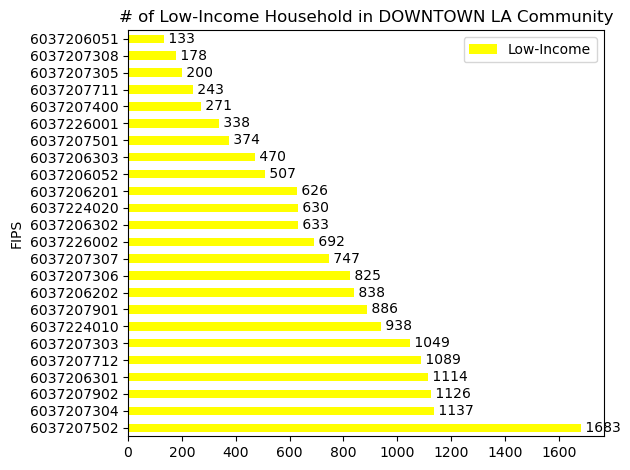

In [110]:
# make the figure looks better
ax = df_sorted.plot.barh(x='FIPS',
                            y='Low-Income', 
                            title='# of Low-Income Household in DOWNTOWN LA Community',
                            color='yellow')

# add number for each column
# define numbers
numbers = [1683, 1137, 1126, 1114, 1089, 1049, 938, 886, 838, 825, 747, 692, 633, 630, 626, 507, 470, 374, 338, 271, 243, 200, 178, 133]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.tight_layout()
plt.savefig('Number of Low-Income Household in DOWNTOWN LA Community')
plt.show()

In Downtown LA community, census tract 6037207502 has the most low-income households, with 1683. Census tract 6037206051 has the fewest low-income households, with 133. The average number of low-income household in Downtown LA community is 697. 

In [111]:
# define variable
df_sorted = data_trimmed.sort_values(by='Middle-Income',ascending = False)
# display data 
df_sorted[['FIPS','Middle-Income']]

,FIPS,Middle-Income
606,6037207902,1952
604,6037207712,1200
583,6037206052,687
605,6037207901,653
762,6037224010,570
601,6037207501,516
603,6037207711,494
594,6037207303,488
602,6037207502,484
597,6037207306,413


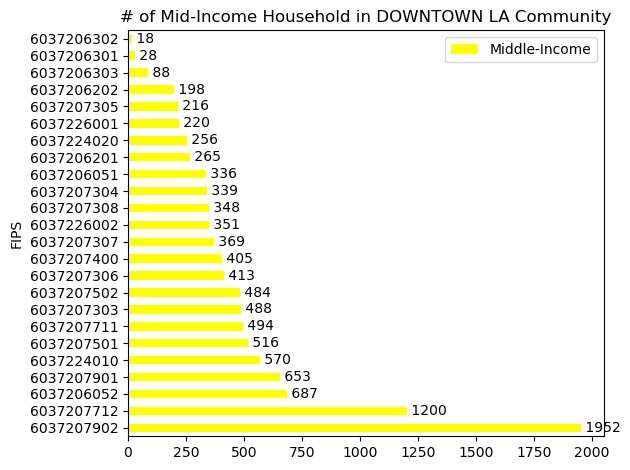

In [112]:
# make the figure looks better
ax = df_sorted.plot.barh(x='FIPS',
                            y='Middle-Income', 
                            title='# of Mid-Income Household in DOWNTOWN LA Community',
                            color='yellow')

# add number for each column
# define numbers
numbers = [1952, 1200, 687, 653, 570, 516, 494, 488, 484, 413, 405, 369, 351, 348, 339, 336, 265, 256, 220, 216, 198, 88, 28, 18]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.tight_layout()
plt.savefig('Number of Middle-Income Household in DOWNTOWN LA Community')
plt.show()

In Downtown LA community, census tract 6037207902 has the most middle-income households, with 1952. Census tract 6037206302 has the fewest middle-income households, with 18. The average number of middle-income household in Downtown LA community is 454. 

In [113]:
# define variable
df_sorted = data_trimmed.sort_values(by='High-Income',ascending = False)
# display data 
df_sorted[['FIPS','High-Income']]

,FIPS,High-Income
606,6037207902,1441
603,6037207711,837
604,6037207712,683
605,6037207901,678
583,6037206052,596
582,6037206051,413
601,6037207501,353
586,6037206201,298
602,6037207502,296
594,6037207303,295


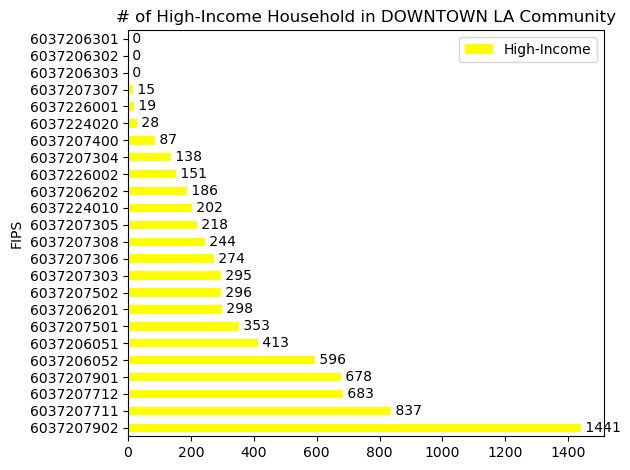

In [114]:
# make the figure looks better
ax = df_sorted.plot.barh(x='FIPS',
                            y='High-Income', 
                            title='# of High-Income Household in DOWNTOWN LA Community',
                            color='yellow')

# add number for each column
# define numbers
numbers = [1441, 837, 683, 678, 596, 413, 353, 298, 296, 295, 274, 244, 218, 202, 186, 151, 138, 87, 28, 19, 15, 0, 0, 0]
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width(),  # set the horizontal position to the end of the bar
             bar.get_y() + bar.get_height() / 2,  # set the vertical position to the center of the bar
             f' {numbers[i]}',  # display number
             va='center')  # center alignment

plt.tight_layout()
plt.savefig('Number of High-Income Household in DOWNTOWN LA Community')
plt.show()

In Downtown LA community, census tract 6037207902 has the most high-income households, with 1441. Census tract 6037206391, 6037206302, and 6037206303 has the fewest high-income households, with 0. The average number of low-income household in Downtown LA community is 311. 

The number of low-income household in Downtown LA community is much higher than that in Pacific Palisades community.

The number of middle-income household in Downtown LA community is higher than that in Pacific Palisades community, but there is not too much difference between them. 

The number of high-income household in Pacific Palisades community is much higher than that in  Downtown LA community.

From the above bar charts, Pacific Palisades community has more high-income households, while Downtown LA community has more low-income households. There is no significant difference of middle-income households between the two communities. Considering that Pacific Palisades community and Downtown LA community has different total number of households, the conclusion could have error if only analysis from number of households. 

## Calculation 

In [64]:
# calculate average low income household in PACIFIC PALISADES community
x1 = 342 + 279 + 251 + 202 + 131 + 90
y1 = x1 / 6
print(x1)
print(y1)

1295
215.83333333333334


In [65]:
# calculate average middle income household in PACIFIC PALISADES community
x2 = 608 + 452 + 412 + 405 + 237 + 231
y2 = x2 / 6
print(x2)
print(y2)

2345
390.8333333333333


In [66]:
# calculate average high income household in PACIFIC PALISADES community
x3 = 1227 + 917 + 889 + 829 + 757 + 723
y3 = x3 / 6
print(x3)
print(y3)

5342
890.3333333333334


In [67]:
# calculate average low income household in DOWNTOWN LA community
x4 = 1683 + 1137 + 1126 + 1114 + 1089 + 1049 + 938 + 886 + 838 + 825 + 747 + 692 + 633 + 630 + 626 + 507 + 470 + 374 + 338 + 271 + 243 + 200 + 178 + 133
y4 = x4 / 24
print(x4)
print(y4)

16727
696.9583333333334


In [68]:
# calculate average middle income household in DOWNTOWN LA community
x5 = 1952 + 1200 + 687 + 653 + 570 + 516 + 494 + 488 + 484 + 413 + 405 + 369 + 351 + 348 + 339 + 336 + 265 + 256 + 220 + 216 + 198 + 88 + 28 + 18
y5 = x5 / 24
print(x5)
print(y5)

10894
453.9166666666667


In [69]:
# calculate average high income household in DOWNTOWN LA community
x6 = 1441 + 837 + 683 + 678 + 596 + 413 + 353 + 298 + 296 + 295 + 274 + 244 + 218 + 202 + 186 + 151 + 138 + 87 + 28 + 19 + 15 + 0 + 0 + 0
y6 = x6 / 24
print(x6)
print(y6)

7452
310.5


In [70]:
# calculate PACIFIC PALISADES percentage
z1 = (x1 / (x1+x2+x3)) * 100
z2 = (x2 / (x1+x2+x3)) * 100
z3 = (x3 / (x1+x2+x3)) * 100
print(z1)
print(z2)
print(z3)

14.417724337564017
26.10777109775106
59.47450456468493


In [71]:
# calculate DOWNTOWN LA percentage
z4 = (x4 / (x4+x5+x6)) * 100
z5 = (x5 / (x4+x5+x6)) * 100
z6 = (x6 / (x4+x5+x6)) * 100
print(z4)
print(z5)
print(z6)

47.691956775867475
31.060930060160235
21.247113163972287


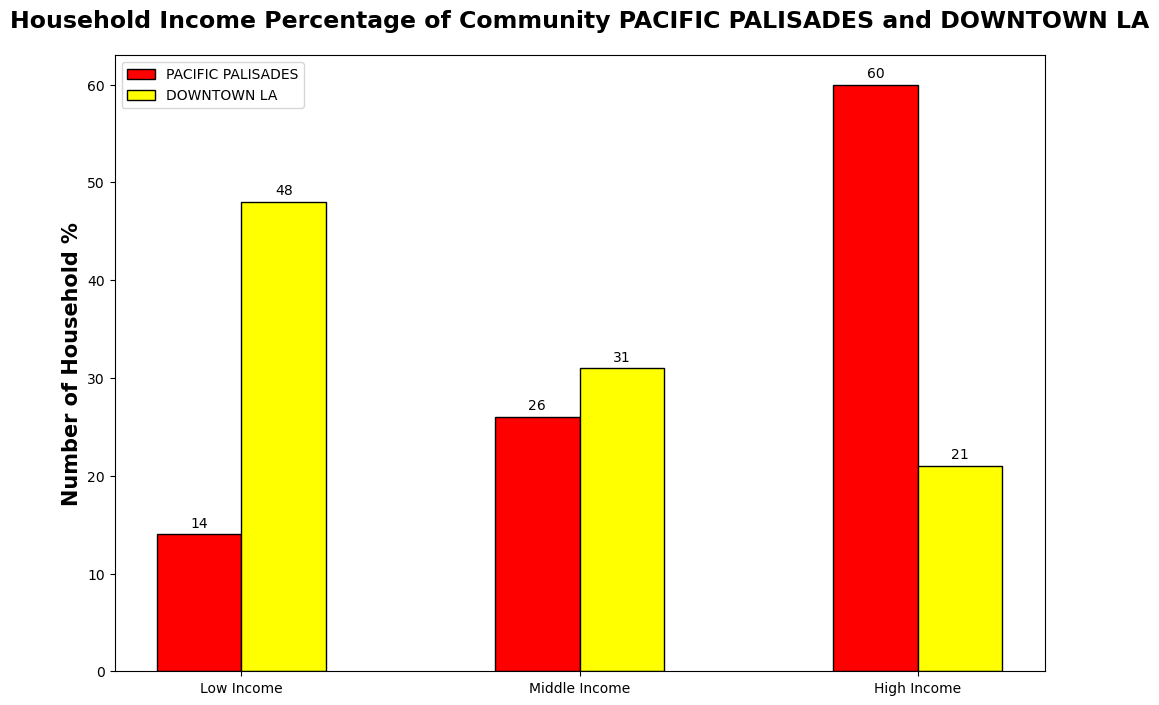

In [72]:
import numpy as np
import matplotlib.pyplot as plt

barWidth = 0.25
fig, ax = plt.subplots(figsize=(12, 8))

PACIFIC_PALISADES = [14, 26, 60]
DOWNTOWN_LA = [48, 31, 21]

br1 = np.arange(len(PACIFIC_PALISADES))
br2 = [x + barWidth for x in br1]

bars1 = ax.bar(br1, PACIFIC_PALISADES, color='red', width=barWidth,
               edgecolor='black', label='PACIFIC PALISADES')
bars2 = ax.bar(br2, DOWNTOWN_LA, color='yellow', width=barWidth,
               edgecolor='black', label='DOWNTOWN LA')

ax.set_ylabel('Number of Household %', fontweight='bold', fontsize=15)
ax.set_xticks([r + barWidth/2 for r in range(len(PACIFIC_PALISADES))])
ax.set_xticklabels(['Low Income', 'Middle Income', 'High Income'])

ax.set_title('Household Income Percentage of Community PACIFIC PALISADES and DOWNTOWN LA', fontweight='bold', fontsize=17, pad=20)

# adding number on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

ax.legend()
plt.savefig('Household Income Comparison')
plt.show()

After we convert the number of households into percentages, we can observe the difference of household income between the two communities more intuitively. In Pacific Palisades community, 60% of the households are high-income households, while only 14% are low-income households. In Downtown LA community, nearly 50% are low-income households, and only 21% high-income households. 


Since Pacific Palisades community represented as low traffic accidents rate community and Downtown LA community represented as high traffic accidents rate community, we can conclude that household income is one of the demographic/socioeconomic characteristics that will influence traffic safety in Los Angeles. Traffic accidents are most probably to happen around low household income areas. High household income areas are less likely to occur traffic accidents. 